In [65]:
import numpy as np
from functions import *
from schemes import *
from plot import * 
from Kepler import * 

%matplotlib inline

In [66]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.8

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

In [67]:
def MaxEnergyError(scheme, h0, T, Nsteps, r0s, v0s, G, masses, title = '', Nrepeats = 5):
    # reposition centre of mass to origin with no momentum 
    rcom, vcom = CentreOfMass(r0s, v0s, masses)
    r0s -= rcom
    v0s -= vcom

    H = np.arange(h0, h0*(Nsteps+1), h0)
    errs = []
    for h in H:
        err = 0
        for _ in range(Nrepeats):
            t_vals, rs_traj, vs_traj, ke_traj, pe_traj, am_traj, times = run_scheme(scheme, 0, T, h, r0s, v0s, G, masses)
            dE,_,_= EnergyError(ke_traj, pe_traj)
            dE = max(abs(dE))
            err += dE
            
        errs.append(err/Nrepeats)
        
    plt.title(f"Relationship between maximum energy change and step size in {title}")
    plt.xlabel('log Step Size')
    plt.ylabel('log Maximum energy difference')

    #find line of best fit
    a, b = np.polyfit(np.log(H), np.log(errs), 1)

    #add points to plot
    plt.scatter(np.log(H), np.log(errs))

    #add line of best fit to plot
    plt.plot(np.log(H), a*np.log(H)+b, color='orange', label = f'Line of best fit, gradient = {a}') 

    plt.legend()

    plt.show()    
    
def MaxError(scheme, r0s, v0s, T, h, G, masses):
    m1 = masses[0]
    m2 = masses[1]
    mu = G * (m1 + m2) 
    
    # reposition centre of mass to origin with no momentum 
    rcom, vcom = CentreOfMass(r0s, v0s, masses)
    r0sprime = r0s - rcom
    v0sprime = v0s - vcom

    traj = run_scheme(EulerStep, 0, T, h, r0sprime, v0sprime, G, masses)
    
    a = SemiMajorAxis(mu, r0s, v0s)
    
    t_traj = np.array(traj[0]) 
    rs_traj = traj[1]

    kepler_traj = KeplerOrbit(a, e, mu, t_traj)
    
    errs = kepler_traj - rs_traj[:,1,:]
    errs = np.linalg.norm(errs, axis = 1)

    return np.max(abs(errs))

def Error(scheme, h0, T, Nsteps, r0s, v0s, G, masses, title = '', Nrepeats = 1):
    H = np.arange(h0, h0*(Nsteps+1), h0)
    errs = []
    for h in H:
        err = 0
        for _ in range(Nrepeats):
            # t_vals, rs_traj, vs_traj, ke_traj, pe_traj, am_traj = run_scheme(scheme, 0, T, h, r0s, v0s, G, masses)
            dE = MaxError(scheme, r0s, v0s, T, h, G, masses)
            # dE = max(abs(dE))
            err += dE
            
        errs.append(err/Nrepeats)
        
    plt.title(f"Relationship between Error against step size in {title}")
    plt.xlabel('log Step Size')
    plt.ylabel('log Maximum Error')

    #find line of best fit
    a, b = np.polyfit(np.log(H), np.log(errs), 1)

    #add points to plot
    plt.scatter(np.log(H), np.log(errs))

    #add line of best fit to plot
    plt.plot(np.log(H), a*np.log(H)+b, color='orange', label = f'Line of best fit, gradient = {a}') 

    plt.legend()

    plt.show()    

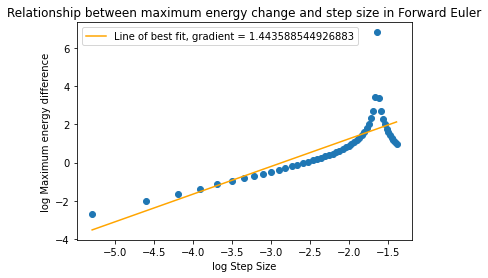

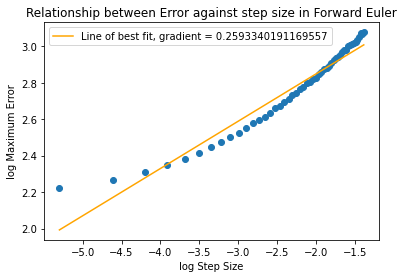

In [68]:
MaxEnergyError(EulerStep, 0.005, 20, 50, r0s, v0s, G, masses, 'Forward Euler')
Error(EulerStep, 0.005, 20, 50, r0s, v0s, G, masses, 'Forward Euler')

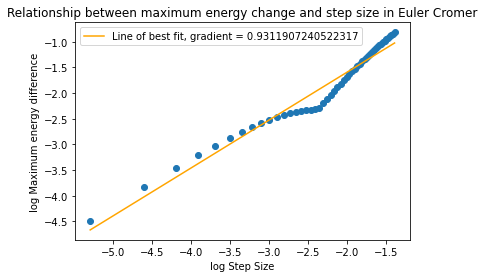

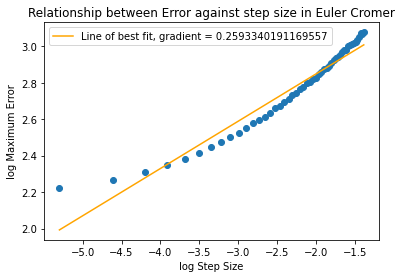

In [69]:
MaxEnergyError(EulerCromerStep, 0.005, 20, 50, r0s, v0s, G, masses, 'Euler Cromer')
Error(EulerStep, 0.005, 20, 50, r0s, v0s, G, masses, 'Euler Cromer')

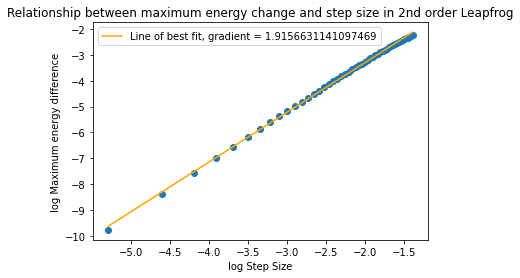

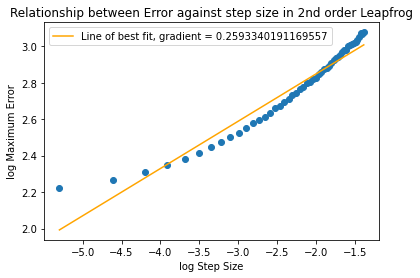

In [70]:
MaxEnergyError(LeapfrogStep, 0.005, 20, 50, r0s, v0s, G, masses, '2nd order Leapfrog')
Error(LeapfrogStep, 0.005, 20, 50, r0s, v0s, G, masses, '2nd order Leapfrog')

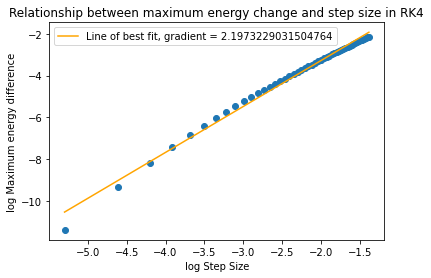

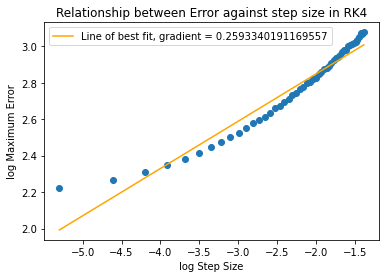

In [71]:
MaxEnergyError(RK4Step,0.005, 20, 50, r0s, v0s, G, masses, 'RK4')
Error(RK4Step, 0.005, 20, 50, r0s, v0s, G, masses, 'RK4')

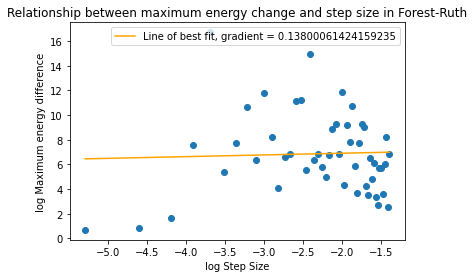

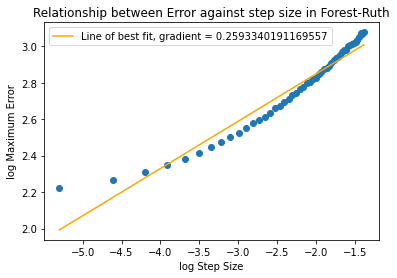

In [72]:
MaxEnergyError(ForestRuthStep, 0.005, 20, 50, r0s, v0s, G, masses, 'Forest-Ruth')
Error(ForestRuthStep, 0.005, 20, 50, r0s, v0s, G, masses, 'Forest-Ruth')

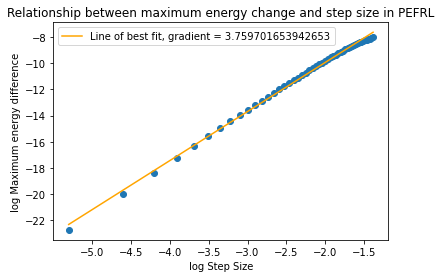

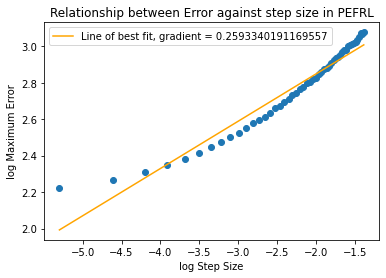

In [73]:
MaxEnergyError(PEFRLStep, 0.005, 20, 50, r0s, v0s, G, masses, 'PEFRL')
Error(PEFRLStep, 0.005, 20, 50, r0s, v0s, G, masses, 'PEFRL')